In [ ]:
#source: http://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/

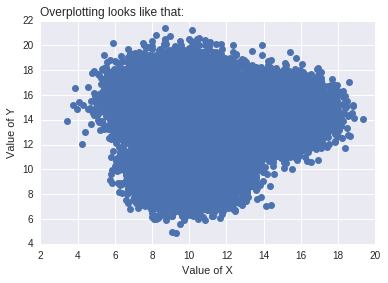

In [4]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
#plt.style.use('seaborn')

%matplotlib inline
# Dataset:
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='', marker='o')
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting looks like that:', loc='left')

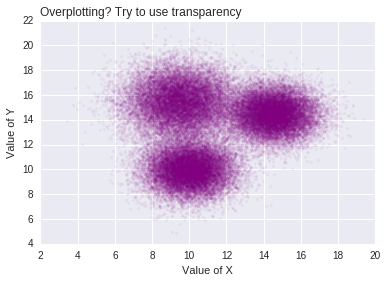

In [5]:
# Plot with transparency
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to use transparency', loc='left')

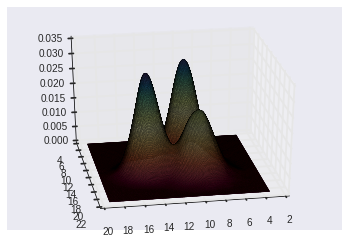

In [6]:
# libraries
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([df.x,df.y])
xi, yi = np.mgrid[ df.x.min():df.x.max():nbins*1j, df.y.min():df.y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)